# KMeans

### Import Libraries and Dataset

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path="/content/drive/MyDrive/assignment 4/data.csv"


In [ ]:
df = pd.read_csv(data_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df= df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=0)

In [ ]:
print(X.columns)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Scaling Numerical Features
# Standardize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
numerical_features = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst' ]
scaler = StandardScaler()
train_df[numerical_features]= scaler.fit_transform(train_df[numerical_features])
# Use the same scaler instance to transform the validation data
val_df[numerical_features] = scaler.transform(val_df[numerical_features])
# Use the same scaler instance to transform the testing data
test_df[numerical_features] = scaler.transform(test_df[numerical_features])
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,-0.232028,B,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,...,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
303,-0.232177,B,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,...,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
155,-0.170811,B,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,...,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716
186,-0.232322,M,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,...,0.998276,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466
101,-0.232412,B,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,...,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260


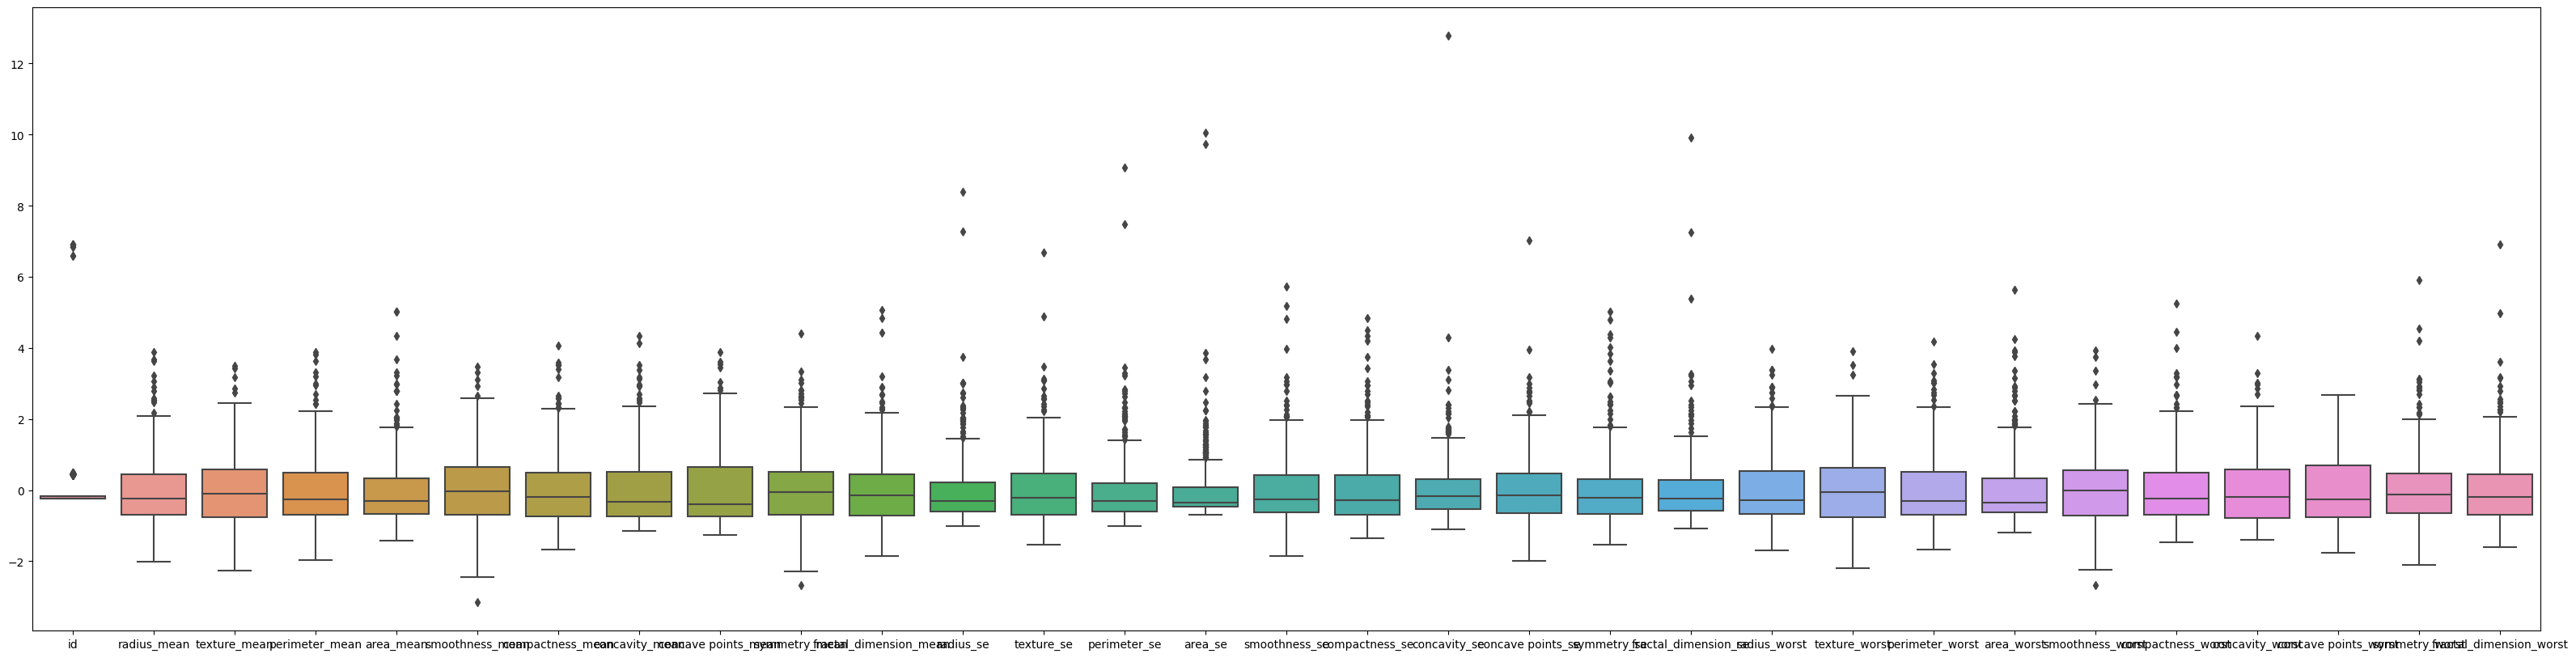

Shape before removing outliers: (398, 32)
Shape after removing outliers: (338, 32)


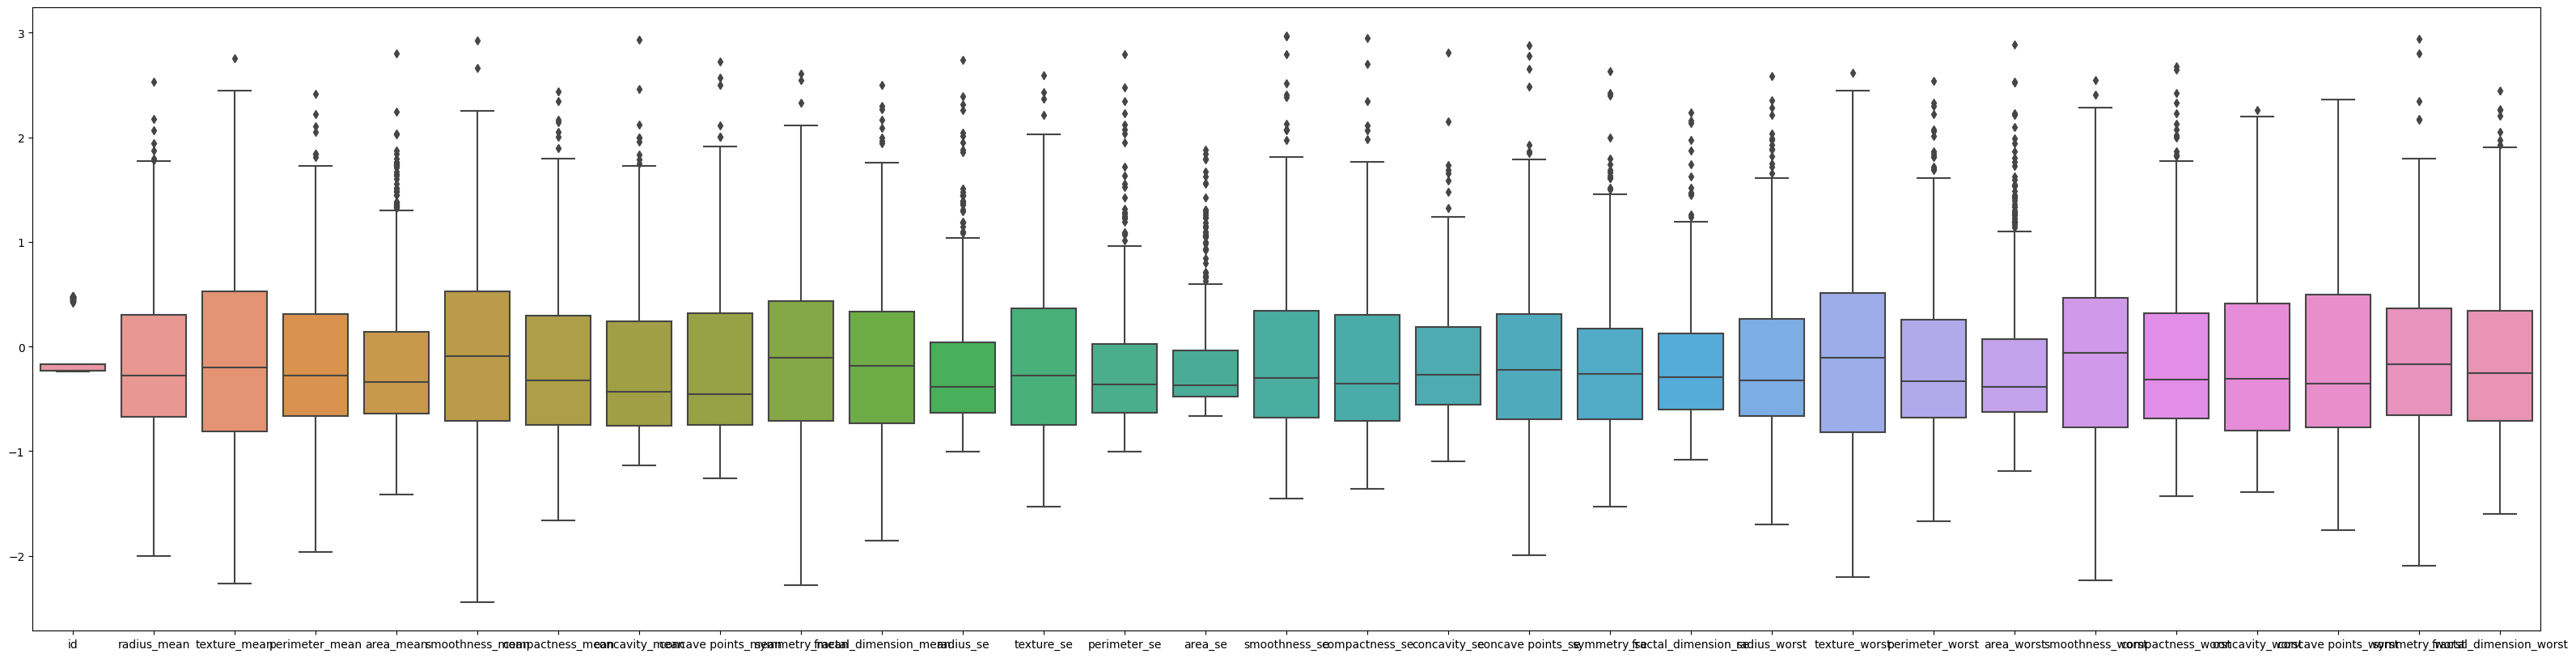

In [ ]:
from scipy.stats import zscore
plt.figure(figsize=(40,10))
sns.boxplot(train_df.drop('diagnosis',axis=1))
plt.show()

# Calculate Z-Scores
z_scores = zscore(train_df.drop('diagnosis',axis=1))

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers = (z_scores > 3) | (z_scores < -3)

# Replace or remove outliers
df_no_outliers = train_df[~outliers.any(axis=1)]

# Display the shape before and after removing outliers
print(f"Shape before removing outliers: {train_df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

plt.figure(figsize=(40, 10))
sns.boxplot(df_no_outliers)
plt.show()

In [ ]:
# Separate the features (X) from the target variable (y) in the training set
X_train = train_df.drop('diagnosis', axis=1)
y_train = train_df['diagnosis']

# Separate the features (X) from the target variable (y) in the test set
X_val = val_df.drop('diagnosis', axis=1)
y_val = val_df['diagnosis']

In [ ]:
X_train.head()
y_train.head()

478    B
303    B
155    B
186    M
101    B
Name: diagnosis, dtype: object

### KMeans

In [ ]:
def kmeans(X, k, max_iters=100, tolerance=1e-4):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return labels, centroids

In [ ]:
# Apply K-means
k = 3
labels, centroids = kmeans(X_train.values, k)

# Print cluster labels and final centroids
print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 1 0 0 2 2 0 0 0 0 0 0 2 2 0 0 1
 2 0 0 0 0 0 2 0 2 0 2 0 1 0 0 0 0 0 0 1 0 2 0 0 0 2 0 0 0 1 0 0 0 2 0 2 0
 1 0 1 1 0 1 0 0 0 2 0 1 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 0 0 0 2 0 2 1 0 1 1 1 0 0 1 2 0 0 1 0 0 0 2 0 0 0 1 0 2 2 1 0 0 0 0 2 0
 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 2 2 0 0 0 1 0 2 2 0 0 0 1 0 2 0 1 2 0 0 2
 2 0 0 0 2 1 1 0 1 0 0 0 1 0 2 1 2 1 2 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0
 2 2 2 1 0 0 2 0 0 1 0 1 0 0 0 0 0 2 2 2 0 2 2 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 2 0 2 0 2 0 0 1 0 0 0 2 0 2 0 0 2 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 2 2 0 0
 0 1 0 0 0 0 2 0 1 1 1 0 2 1 2 0 2 2 0 0 0 0 0 0 0 0 2 2 1 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 2 1 0 0 1 2 1 0 2 1 2 0 0 2 0 1 1 0 0 0
 1 2 0 0 2 1 0 0 1 1 0 0 0 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0]


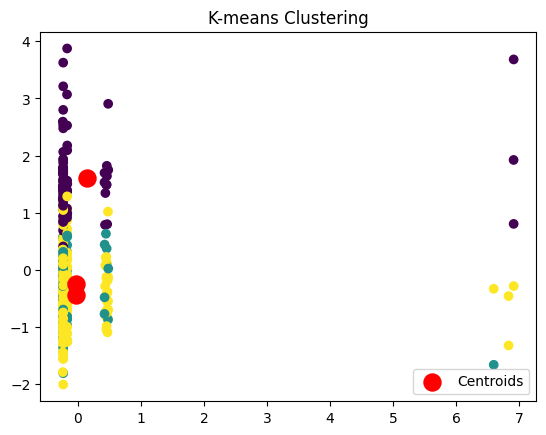

In [ ]:
X_train_std = scaler.fit_transform(X_train)

# Apply K-means
labels, centroids = kmeans(X_train_std, k)

# Plot the results
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
# Apply K-means
k1 = 5
labels, centroids = kmeans(X_train.values, k1)

# Print cluster labels and final centroids
print("Cluster Labels:", labels)

Cluster Labels: [1 1 2 2 1 1 2 2 2 0 1 2 2 2 1 2 1 0 2 1 0 3 1 1 0 0 2 2 2 2 2 2 0 0 2 2 4
 0 2 1 2 1 2 0 1 0 2 0 2 3 1 2 2 2 2 1 3 2 0 2 1 2 0 1 2 2 3 1 2 2 0 2 3 1
 3 2 3 3 2 1 1 2 2 0 2 3 2 0 2 3 0 2 2 2 1 1 2 2 2 2 2 4 2 2 0 1 2 1 3 2 1
 2 1 2 2 0 2 0 1 1 3 1 3 2 1 3 0 2 2 3 1 2 1 0 1 2 2 4 2 0 0 4 1 1 2 2 0 2
 2 2 2 1 2 2 0 1 4 2 1 3 2 2 1 1 0 0 2 2 2 3 2 0 0 2 1 2 3 1 0 2 4 0 2 2 0
 0 1 2 1 0 3 1 2 3 1 1 1 3 2 0 1 0 3 0 0 1 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 0 0 3 2 2 3 1 2 4 2 3 1 1 1 1 1 0 0 0 1 0 3 2 1 2 1 2 2 3 2 2 1 2 1 2 3
 0 2 0 1 3 2 2 4 1 1 2 0 2 3 1 2 3 3 2 2 1 1 3 3 2 1 2 1 2 2 2 1 2 0 0 2 1
 1 3 2 2 1 2 0 2 3 3 3 1 3 1 0 1 0 0 1 2 2 1 2 2 1 2 0 0 3 2 0 2 1 2 2 2 2
 1 0 2 2 2 1 2 2 2 0 2 3 2 3 1 2 2 0 3 2 2 3 0 3 2 3 4 0 1 1 0 1 1 3 2 2 1
 4 0 2 2 0 4 2 1 3 1 2 1 1 3 1 2 0 1 2 1 2 2 0 2 3 1 2 1]


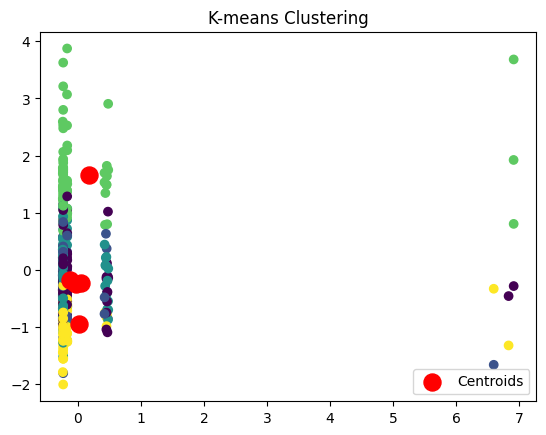

In [ ]:
X_train_std = scaler.fit_transform(X_train)

# Apply K-means
labels, centroids = kmeans(X_train_std, k1)

# Plot the results
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
# Apply K-means
k2 = 2
labels, centroids = kmeans(X_train.values, k2)

# Print cluster labels and final centroids
print("Cluster Labels:", labels)

Cluster Labels: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1]


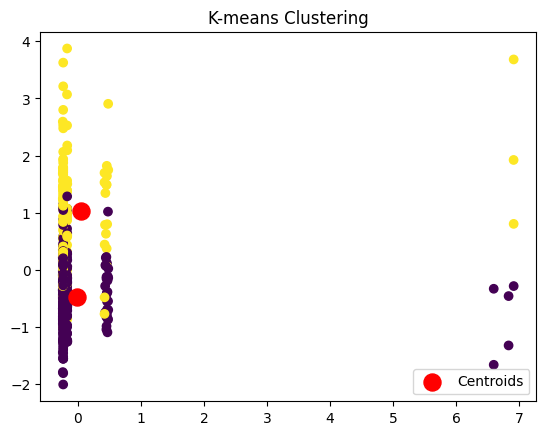

In [ ]:
X_train_std = scaler.fit_transform(X_train)

# Apply K-means
labels, centroids = kmeans(X_train_std, k2)

# Plot the results
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

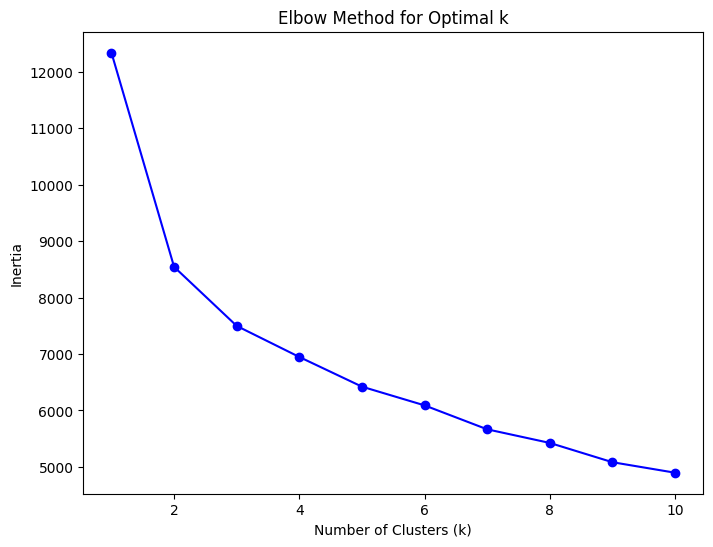

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
k_values = range(1,11)
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Calculate the means
overall_mean = np.mean(X_train_std, axis=0)
# Calculate SST
sst = np.sum((X_train_std - overall_mean) ** 2)

print("Total Sum of Squares (SST):", sst)

Total Sum of Squares (SST): 12338.0


### PCA

In [ ]:
def pca(X, n_components):
    # Standardize the data (zero mean and unit variance)
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'n_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project the data onto the new subspace
    pca_result = np.dot(X_standardized, top_eigenvectors)

    return pca_result


In [ ]:
# Specify the number of components for PCA
num_components = 2

# Apply PCA
X_train_pca = pca(X_train, num_components)

print("Original data shape:", X_train.shape)
print("PCA result shape:", X_train_pca.shape)

Original data shape: (398, 31)
PCA result shape: (398, 2)


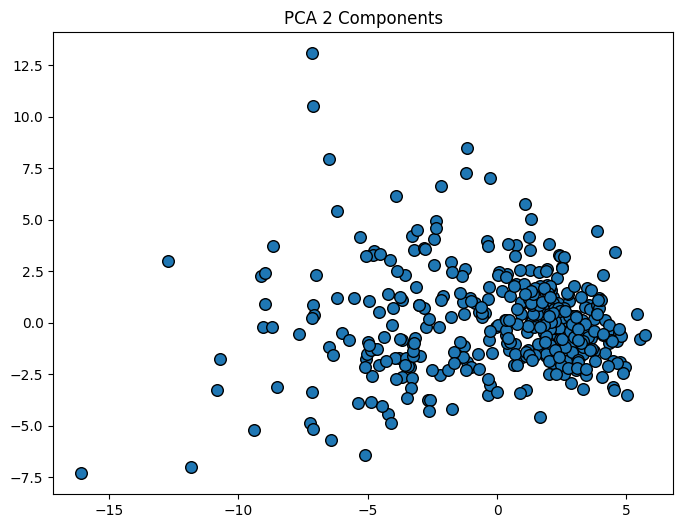

In [ ]:
# Visualize the results
plt.figure(figsize=(8, 6))

# Scatter plot
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], edgecolor='k', s=70)

plt.title('PCA 2 Components')

plt.show()


Original data shape: (398, 31)
PCA result shape: (398, 3)


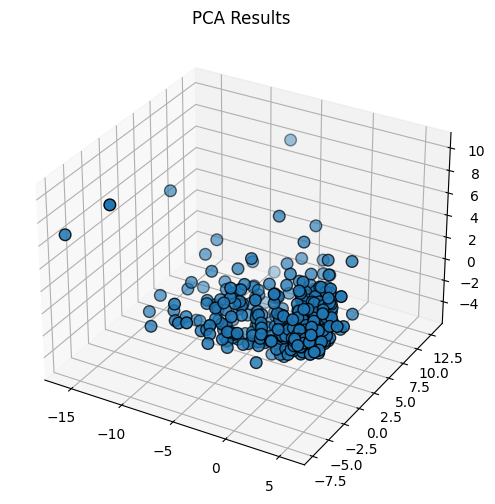

In [ ]:
# Specify the number of components for PCA
num_components = 3

# Apply PCA
X_train_pca1 = pca(X_train, num_components)

print("Original data shape:", X_train.shape)
print("PCA result shape:", X_train_pca1.shape)

# Visualize the results
fig=plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot
scatter =ax.scatter(X_train_pca1[:, 0], X_train_pca1[:, 1],X_train_pca1[:, 2], edgecolor='k', s=70)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.title('PCA Results')

plt.show()

### KMeans After PCA

In [ ]:
# Apply K-means
k = 3
labels, centroids = kmeans(X_train_pca, k)

# Print cluster labels and final centroids
print("Cluster Labels:", labels)
print("Final Centroids:\n", centroids)

Cluster Labels: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 2 1 2 0 0 1 1 1 1 1 1 0 0 1 1 2
 0 1 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 2 1 1 1 0 1 0 1
 2 1 2 2 1 2 1 1 1 0 1 2 1 0 1 2 0 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 2 1 1
 1 1 1 1 0 1 0 2 1 2 2 2 1 1 2 0 1 1 2 1 1 1 0 1 1 1 2 1 0 0 2 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 2 1 1 2 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 2 1 0 1 2 0 1 1 2
 0 1 1 1 0 2 2 1 2 1 1 1 2 1 0 2 0 2 0 0 2 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 2 1 1 0 1 1 2 1 2 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 2 1 1 1 2
 0 1 0 1 0 1 1 2 1 1 1 0 1 0 1 1 0 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 0 0 1 1
 1 2 1 1 1 1 0 1 2 2 2 1 0 2 0 1 0 0 1 1 1 1 1 1 1 1 0 0 2 1 0 1 1 1 1 1 1
 1 0 1 1 1 2 1 1 1 0 1 2 1 2 1 1 1 0 2 1 1 2 0 2 1 0 2 0 1 1 0 1 2 0 1 1 1
 2 0 1 1 0 2 1 2 2 2 1 2 1 0 2 1 0 1 1 1 1 1 0 1 2 1 1 1]
Final Centroids:
 [[-5.34477476 -1.73881767]
 [ 2.23690548 -0.31865025]
 [-1.99822829  3.26994963]]


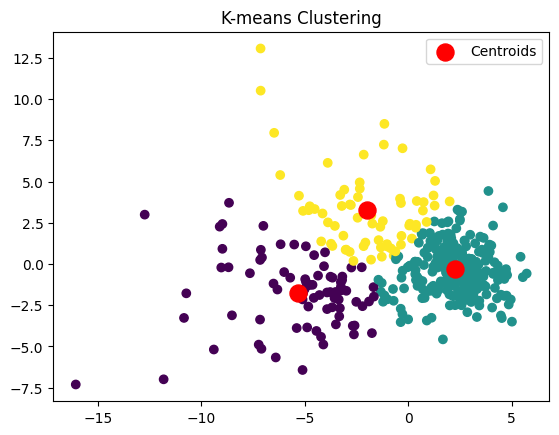

In [ ]:
# Apply K-means
#labels, centroids = kmeans(X_train_pca, k)

# Plot the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
# Apply K-means
k1 = 5
labels1, centroids1 = kmeans(X_train_pca, k1)

# Note: Visualization is challenging with more than two features, so we won't plot the results

# Print cluster labels and final centroids
print("Cluster Labels:", labels1)
print("Final Centroids:\n", centroids1)


Cluster Labels: [3 0 0 1 3 0 3 0 0 1 3 0 0 3 0 0 3 1 0 3 1 2 3 3 4 4 0 0 0 0 0 0 4 1 0 0 2
 1 0 3 0 3 0 4 3 4 0 1 3 2 0 0 0 0 0 3 1 0 1 0 3 0 1 0 0 0 2 3 0 1 1 0 4 3
 2 0 2 2 1 3 3 0 0 4 3 2 0 1 0 3 1 0 0 0 3 0 0 3 0 0 0 3 0 0 1 3 0 3 2 0 3
 0 3 0 0 4 0 1 3 3 3 3 2 1 0 2 1 3 0 2 0 0 3 1 3 0 0 2 0 1 1 3 3 3 0 1 1 0
 3 0 0 3 0 0 1 3 2 3 3 3 3 0 3 3 1 4 0 3 0 1 0 1 1 0 3 0 3 3 1 0 2 1 0 0 1
 4 3 0 0 1 3 3 0 2 3 3 0 2 0 1 3 4 1 1 1 3 0 0 3 0 1 0 0 0 0 0 3 0 0 1 0 0
 1 1 2 2 0 3 2 3 0 2 1 3 3 3 3 3 3 1 1 4 3 1 4 0 3 0 3 0 3 1 0 0 3 0 0 0 2
 1 0 1 3 2 0 0 2 0 3 0 1 1 1 3 0 2 1 0 0 3 3 3 2 0 3 0 0 0 0 0 3 0 4 1 3 3
 0 2 0 0 3 0 1 0 2 3 2 3 4 3 1 3 1 4 3 0 0 3 0 0 3 0 4 4 1 1 1 3 3 0 0 0 0
 3 1 0 1 0 3 3 3 0 4 1 2 0 2 3 0 3 4 2 1 3 1 1 2 0 4 3 1 3 3 1 3 3 1 0 0 3
 2 1 0 0 4 3 3 3 1 3 0 3 3 2 3 0 1 3 0 3 3 0 1 1 2 0 0 3]
Final Centroids:
 [[ 2.87833376 -1.00510642]
 [-3.14780719 -1.79669193]
 [-3.98235825  4.24506309]
 [ 1.16354408  1.44757417]
 [-8.85135907 -1.83018069]]


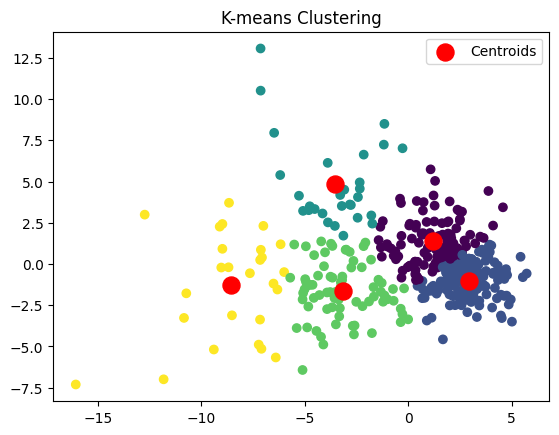

In [ ]:
# Apply K-means
labels, centroids = kmeans(X_train_pca, k1)

# Plot the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
# Apply K-means
k2 = 2
labels, centroids = kmeans(X_train_pca, k2)

# Print cluster labels and final centroids
print("Cluster Labels:", labels)
print("Final Centroids:\n", centroids)

Cluster Labels: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
Final Centroids:
 [[ 2.09650485 -0.0279583 ]
 [-4.52578824  0.06035443]]


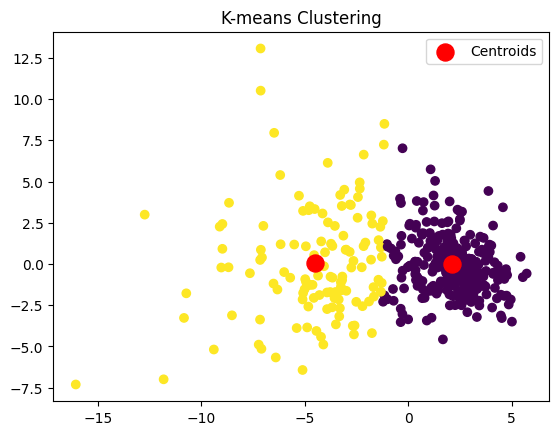

In [ ]:
# Apply K-means
#labels, centroids = kmeans(X_train_pca, k2)

# Plot the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

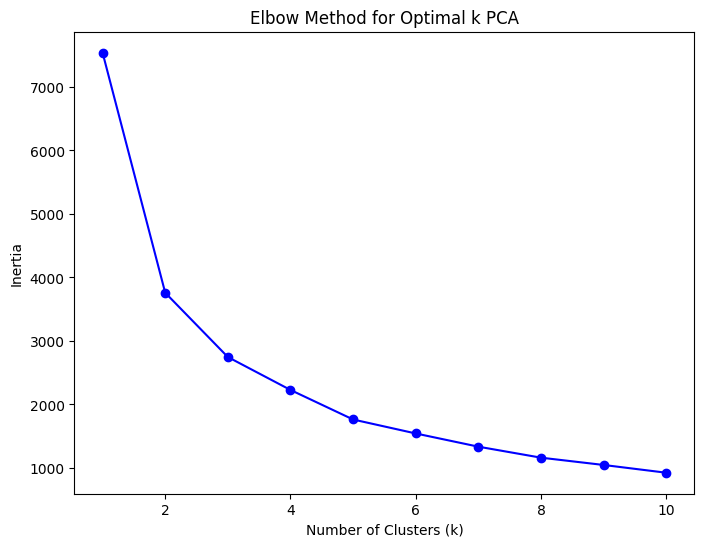

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
k_values = range(1,11)
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:

# Calculate the means
overall_mean = np.mean(X_train_pca, axis=0)
# Calculate SST
sst = np.sum((X_train_pca - overall_mean) ** 2)

print("Total Sum of Squares (SST):", sst)

Total Sum of Squares (SST): 7539.434087284935
